In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Instructions for updating:
Colocations handled automatically by placer.
Train on 17501 samples, validate on 7501 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
17501/17501 [==============================] - 645s 37ms/sample - loss: 0.6992 - acc: 0.4960 - val_loss: 0.6932 - val_acc: 0.4978
Epoch 2/3
17501/17501 [==============================] - 642s 37ms/sample - loss: 0.6934 - acc: 0.4985 - val_loss: 0.6933 - val_acc: 0.4978
Epoch 3/3
17501/17501 [==============================] - 658s 38ms/sample - loss: 0.6934 - acc: 0.4974 - val_loss: 0.6932 - val_acc: 0.4978


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 256)       2560      
_________________________________________________________________
activation (Activation)      (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       590080    
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
__________

In [3]:
loss,accuracy=model.evaluate(X,y)

25002/25002 [==============================] - 446s 18ms/sample - loss: 0.6931 - acc: 0.5000


In [4]:
model.save("Cat_dog_Classifier.model")

In [5]:
new_model=tf.keras.models.load_model("Cat_dog_Classifier.model")

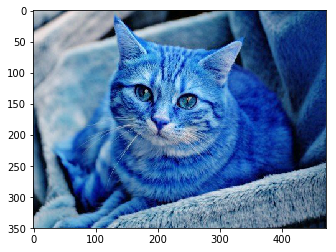

In [9]:
import cv2
import matplotlib.pyplot as plt
img_test=cv2.imread("Cat.jpg")
plt.imshow(img_test)
plt.show()

In [22]:
img_test.shape
#predictions = new_model.predict(X[0])
img_test.shape

(350, 471, 3)

In [23]:
img_size=50
new_array=cv2.resize(img_test,(img_size,img_size))

In [26]:
new_array.shape

(50, 50, 3)

In [27]:
new_array.reshape(-1,img_size, img_size, 1)

array([[[[2.91549404e-03],
         [2.98346790e-03],
         [3.06036140e-03],
         ...,
         [2.63760092e-03],
         [1.74640523e-03],
         [1.95955402e-03]],

        [[2.23637063e-03],
         [4.49058055e-04],
         [7.15878508e-04],
         ...,
         [2.19992311e-03],
         [2.57362553e-03],
         [1.46528258e-03]],

        [[2.14302191e-03],
         [2.58685121e-03],
         [6.01307190e-04],
         ...,
         [3.64475202e-05],
         [5.56093810e-04],
         [1.57108804e-03]],

        ...,

        [[1.47743176e-03],
         [2.89334871e-03],
         [6.07612457e-04],
         ...,
         [3.72318339e-04],
         [1.24890427e-03],
         [2.18700500e-03]],

        [[2.28819685e-03],
         [2.53102653e-03],
         [2.79892349e-03],
         ...,
         [3.19061899e-03],
         [1.42914264e-03],
         [2.47920031e-03]],

        [[3.17339485e-03],
         [2.33833141e-03],
         [3.07112649e-03],
         ...,
 

In [28]:
new_array.shape

(50, 50, 3)

In [29]:
predictions = new_model.predict(new_array)

ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (50, 50, 3)